<a href="https://colab.research.google.com/github/rebertmatheus/colab-notebooks/blob/master/LAB_Redu%C3%A7%C3%A3o_de_dimensionalidade_e_binarizacao_de_imagens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LAB - Redução de Dimensionalidade e Binarização de imagens.

In [18]:
from PIL import Image
import numpy as np
import cv2
from google.colab.patches import cv2_imshow



In [2]:
def grayscale(image):
  width, height = image.size
  grayscale_image = Image.new('L', (width, height))

  for x in range(width):
    for y in range(height):
      r, g, b = image.getpixel((x, y))

      # Convert to grayscale using the standard formula
      gray = int(0.299 * r + 0.587 * g + 0.114 * b)
      # Update the pixel in the grayscale image
      grayscale_image.putpixel((x, y), gray)

  return grayscale_image


In [3]:
def binarize(grayscale_image, threshold=128):
  width, height = grayscale_image.size
  binary_image = Image.new('L', (width, height))

  for y in range(height):
    for x in range(width):
      # Get the grayscale value of the pixel
      gray = grayscale_image.getpixel((x, y))

      # Apply the binarization based on the threshold
      binary_value = 255 if gray >= threshold else 0

      # Update the pixel in the binary image
      binary_image.putpixel((x, y), binary_value)

  return binary_image


In [9]:
def process_image(image_path, image_name, image_extension, threshold=128):
    image = Image.open(image_path+"/"+image_name+"."+image_extension).convert('RGB')

    print("Original Image:")
    display(image)

    grayscale_image = grayscale(image)
    grayscale_image.save("grayscale_images/grayscale_"+image_name+".png")

    print("\nGrayscale Image:")
    display(grayscale_image)

    binary_image = binarize(grayscale_image, threshold)
    binary_image.save("binary_images/binary_"+image_name+".png")

    print("\nBinary Image:")
    display(binary_image)

In [27]:
def binarize_image_v2(image_path, image_name, image_extension, threshold=128):
  img = cv2.imread(image_path+"/"+image_name+"."+image_extension)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  soft = cv2.GaussianBlur(img, (7, 7), 0)
  (T, bin) = cv2.threshold(soft, threshold, 255, cv2.THRESH_BINARY)
  (T, binI) = cv2.threshold(soft, threshold, 255, cv2.THRESH_BINARY_INV)
  result = np.vstack([
    np.hstack([soft, bin]),
    np.hstack([binI, cv2.bitwise_and(img, img, mask = binI)])
  ])
  cv2.imwrite("binary_images/binary_"+image_name+"_v2.png", result)
  print("\nBinarização Aula")
  cv2_imshow(result)


Original Image:


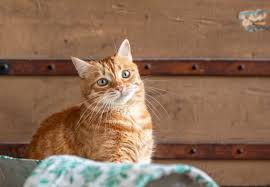


Grayscale Image:


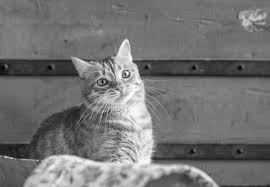


Binary Image:


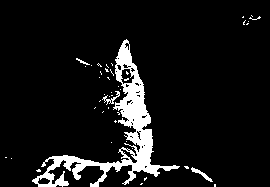


Binarização Aula


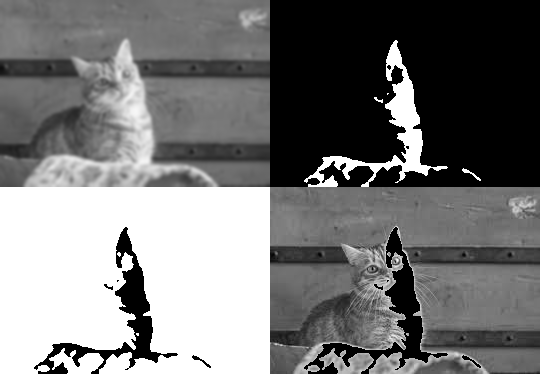

In [28]:
thresh = 192
process_image('original_images','cat_01', 'jpeg', thresh)
binarize_image_v2('original_images','cat_01', 'jpeg', thresh)
